In [1]:
% matplotlib inline
% reload_ext autoreload
% autoreload 2

In [2]:
import pandas as pd
import numpy as np
from IPython.display import HTML

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [3]:
from fastai.structured import *
from fastai.column_data import *
from fastai.imports import *
np.set_printoptions(threshold=50, edgeitems=20)

In [4]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
from fastai.metrics import *
from math import pi
from datetime import timedelta

In [24]:
#PATH = 'data/ncaa/DataFiles/'
PATH = 'data/ncaa/DataFiles/2018/'
#PATH = 'data/women_ncaa/'

In [25]:
os.listdir(PATH)

['MasseyOrdinals_thruSeason2018_Day128.csv',
 'Stage2UpdatedDataFiles.zip',
 'Seasons.csv',
 'RegularSeasonDetailedResultsEnriched.csv',
 'ConferenceTourneyGames.csv',
 'NCAATourneySlots.csv',
 'NCAATourneySeeds.csv',
 'RegularSeasonCompactResults.csv',
 'GameCities.csv',
 'SampleSubmissionStage2.csv',
 'Cities.csv',
 'RegularSeasonDetailedResults.csv',
 'Seasons_SampleTourney2018.csv',
 'SampleTourney2018.zip',
 'models',
 'SampleSubmissionStage2_SampleTourney2018.csv',
 'TeamCoaches.csv',
 'MasseyOrdinals_thruSeason2018_Day128.zip',
 'tmp',
 'NCAATourneySlots_SampleTourney2018.csv',
 'Stage2UnchangedDataFiles.zip',
 'Bracket_SampleTourney2018.png',
 'NCAATourneySeeds_SampleTourney2018.csv']

In [26]:
table_names = ['MasseyOrdinals_thruSeason2018_Day128', 'Seasons', 
               'NCAATourneySeeds', 'SampleSubmissionStage2', 'TeamCoaches']

In [27]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [28]:
for t in tables: display(t.head())

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


,ID,Pred
0,2018_1104_1112,0.5
1,2018_1104_1113,0.5
2,2018_1104_1116,0.5
3,2018_1104_1120,0.5
4,2018_1104_1137,0.5


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney


In [29]:
for t in tables: display(DataFrameSummary(t).summary())

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
count,3.47033e+06,3.47033e+06,NaN,3.47033e+06,3.47033e+06
mean,2011.83,86.6081,NaN,1284.31,171.13
std,4.3648,32.1656,NaN,104.354,100.143
min,2003,0,NaN,1101,1
25%,2009,64,NaN,1194,84
50%,2012,91,NaN,1283,171
75%,2016,114,NaN,1375,258
max,2018,133,NaN,1464,351
counts,3470328,3470328,3470328,3470328,3470328
uniques,16,90,166,355,351


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
count,34,NaN,NaN,NaN,NaN,NaN
mean,2001.5,NaN,NaN,NaN,NaN,NaN
std,9.95825,NaN,NaN,NaN,NaN,NaN
min,1985,NaN,NaN,NaN,NaN,NaN
25%,1993.25,NaN,NaN,NaN,NaN,NaN
50%,2001.5,NaN,NaN,NaN,NaN,NaN
75%,2009.75,NaN,NaN,NaN,NaN,NaN
max,2018,NaN,NaN,NaN,NaN,NaN
counts,34,34,34,34,34,34
uniques,34,34,3,7,6,7


,Season,Seed,TeamID
count,2218,NaN,2218
mean,2001.71,NaN,1291.6
std,9.85151,NaN,103.343
min,1985,NaN,1102
25%,1993,NaN,1208
50%,2002,NaN,1287
75%,2010,NaN,1387
max,2018,NaN,1463
counts,2218,2218,2218
uniques,34,90,298


,ID,Pred
count,NaN,2278
mean,NaN,0.5
std,NaN,0
min,NaN,0.5
25%,NaN,0.5
50%,NaN,0.5
75%,NaN,0.5
max,NaN,0.5
counts,2278,2278
uniques,2278,1


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
count,10994,10994,10994,10994,NaN
mean,2002.21,1284.57,0.683009,153.189,NaN
std,9.77833,104.94,7.38518,8.61731,NaN
min,1985,1101,0,20,NaN
25%,1994,1193,0,154,NaN
50%,2003,1283,0,154,NaN
75%,2011,1377.75,0,154,NaN
max,2018,1464,135,154,NaN
counts,10994,10994,10994,10994,10994
uniques,34,364,63,63,1383


In [30]:
massey, seasons, seeds, sample_sub, coaches = tables

In [31]:
#df = pd.read_csv(PATH+'NCAATourneyDetailedResults.csv')
df = pd.read_csv(PATH+'RegularSeasonDetailedResults.csv')
#df = pd.read_csv(PATH+'WRegularSeasonDetailedResults_PrelimData2018.csv')

In [32]:
massey['Rating'] = 100 - 4*np.log(massey.OrdinalRank+1) - massey.OrdinalRank/22

In [33]:
massey = massey[(massey.RankingDayNum==128)].copy()

In [34]:
massey.rename(columns={'RankingDayNum': 'DayNum'}, inplace=True)

In [35]:
#bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
mr_mean = massey[['TeamID', 'DayNum', 'Rating', 
                  'Season']].sort_index().groupby(['TeamID', 'DayNum', 'Season'], as_index=False).mean()

In [36]:
mr_mean.head()

,TeamID,DayNum,Season,Rating
0,1101,128,2014,61.345703
1,1101,128,2015,61.815592
2,1101,128,2016,62.992623
3,1101,128,2017,63.827009
4,1101,128,2018,65.842841


In [37]:
def join_df(left, right, left_on, right_on=None, on=None, how='left', suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, left_on=left_on, right_on=right_on,
                      on=on, how=how, suffixes=("", suffix))

In [38]:
mr_mean.rename(columns={'TeamID': 'TeamID1'}, inplace=True)

In [39]:
seasons = seasons[['Season', 'DayZero']]

In [40]:
seasons = seasons[(seasons.Season>2002)]

In [41]:
joined = join_df(mr_mean, seasons, 'Season')

In [42]:
joined.head(3)

,TeamID1,DayNum,Season,Rating,DayZero
0,1101,128,2014,61.345703,11/4/2013
1,1101,128,2015,61.815592,11/3/2014
2,1101,128,2016,62.992623,11/2/2015


In [43]:
joined.drop('DayNum', inplace=True, axis=1)

In [ ]:
df_trn.head(3)

In [ ]:
joined_df = join_df(df_trn, joined, ['TeamID1', 'Season'])

In [ ]:
joined_df.head()

In [79]:
joined.rename(columns={'TeamID1': 'TeamID2'}, inplace=True)

In [82]:
joined_df = join_df(joined_df, joined, ['TeamID2', 'Season'])

In [83]:
joined_df.head()

,Season,TeamID1,TeamID2,FTAR,ORP,DRP,PIE,eFGP,Result,Rating,DayZero,Rating_y,DayZero_y
0,2003,1104,1328,-0.104750,0.094771,0.094771,0.065693,0.057417,1,83.513227,11/4/2002,91.054830,11/4/2002
1,2003,1272,1393,0.007944,-0.041667,-0.041667,0.204678,0.080886,1,85.635698,11/4/2002,89.901306,11/4/2002
2,2003,1266,1437,0.184932,-0.107962,-0.107962,0.472868,0.160841,1,91.046518,11/4/2002,79.076048,11/4/2002
3,2003,1296,1457,0.509667,-0.241453,-0.241453,0.509434,0.084586,1,74.348154,11/4/2002,71.928464,11/4/2002
4,2003,1400,1208,-0.222369,0.042878,0.042878,0.141463,0.105500,1,93.161461,11/4/2002,88.262786,11/4/2002


In [84]:
joined_df['DayZero'] = pd.to_datetime(joined_df['DayZero'])

In [ ]:
joined_df['Date'] = joined_df.apply(lambda row: row.DayZero + timedelta(days=row.DayNum), axis=1)
#df['Value'] = df.apply(lambda row: my_test(row['a'], row['c']), axis=1)

In [86]:
joined_df.drop(['DayZero', 'DayZero_y'], inplace=True, axis=1)

In [87]:
joined_df[['Rating', 'Rating_y']] = joined_df[['Rating', 'Rating_y']].fillna(0.0).astype(int)

In [ ]:
joined.to_feather(f'{PATH}tmp/joined_df')

In [88]:
joined = pd.read_feather(f'{PATH}tmp/joined_df')

In [89]:
joined_df.head(3)

,Season,TeamID1,TeamID2,FTAR,ORP,DRP,PIE,eFGP,Result,Rating,Rating_y
0,2003,1104,1328,-0.104750,0.094771,0.094771,0.065693,0.057417,1,83,91
1,2003,1272,1393,0.007944,-0.041667,-0.041667,0.204678,0.080886,1,85,89
2,2003,1266,1437,0.184932,-0.107962,-0.107962,0.472868,0.160841,1,91,79


In [ ]:
joined_df[(joined_df.Date=='2002-11-14')]

In [ ]:
add_datepart(joined, "Date", drop=False)

In [ ]:
joined = joined.groupby('TeamID').mean()

In [ ]:
joined.head(3)

In [ ]:
# run for women's prelim data
df = df.loc[(df['Season']<2018)].copy()
df.tail(3)

Thanks to Laksan Nathan's [Feature Engineering with Advanced Stats](https://www.kaggle.com/lnatml/feature-engineering-with-advanced-stats/notebook) for feature engineering code. In short, a team's offensive and defensive efficiency combined with stats on rebounding, defense, fouls, etc., provide a more robust measure of a team's overall performance.

In [ ]:
#Points Winning/Losing Team
df['WPts'] = df.apply(lambda row: 2*row.WFGM + row.WFGM3 + row.WFTM, axis=1)
df['LPts'] = df.apply(lambda row: 2*row.LFGM + row.LFGM3 + row.LFTM, axis=1)

#Calculate Winning/losing Team Possesion Feature
wPos = df.apply(lambda row: 0.96*(row.WFGA + row.WTO + 0.44*row.WFTA - row.WOR), axis=1)
lPos = df.apply(lambda row: 0.96*(row.LFGA + row.LTO + 0.44*row.LFTA - row.LOR), axis=1)
#two teams use almost the same number of possessions in a game
#(plus/minus one or two - depending on how quarters end)
#so let's just take the average
df['Pos'] = (wPos+lPos)/2

In [ ]:
#Offensive efficiency (OffRtg) = 100 x (Points / Possessions)
df['WOffRtg'] = df.apply(lambda row: 100 * (row.WPts / row.Pos), axis=1)
df['LOffRtg'] = df.apply(lambda row: 100 * (row.LPts / row.Pos), axis=1)
#Defensive efficiency (DefRtg) = 100 x (Opponent points / Opponent possessions)
df['WDefRtg'] = df.LOffRtg
df['LDefRtg'] = df.WOffRtg
#Net Rating = Off.eff - Def.eff
df['WNetRtg'] = df.apply(lambda row:(row.WOffRtg - row.WDefRtg), axis=1)
df['LNetRtg'] = df.apply(lambda row:(row.LOffRtg - row.LDefRtg), axis=1)
                         
#Assist Ratio : Percentage of team possessions that end in assists
df['WAstR'] = df.apply(lambda row: 100 * row.WAst / (row.WFGA + 0.44*row.WFTA + row.WAst + row.WTO), axis=1)
df['LAstR'] = df.apply(lambda row: 100 * row.LAst / (row.LFGA + 0.44*row.LFTA + row.LAst + row.LTO), axis=1)
#Turnover Ratio: Number of turnovers of a team per 100 possessions used.
#(TO * 100) / (FGA + (FTA * 0.44) + AST + TO
df['WTOR'] = df.apply(lambda row: 100 * row.WTO / (row.WFGA + 0.44*row.WFTA + row.WAst + row.WTO), axis=1)
df['LTOR'] = df.apply(lambda row: 100 * row.LTO / (row.LFGA + 0.44*row.LFTA + row.LAst + row.LTO), axis=1)
                    
#The Shooting Percentage : Measure of Shooting Efficiency (FGA/FGA3, FTA)
df['WTSP'] = df.apply(lambda row: 100 * row.WPts / (2 * (row.WFGA + 0.44 * row.WFTA)), axis=1)
df['LTSP'] = df.apply(lambda row: 100 * row.LPts / (2 * (row.LFGA + 0.44 * row.LFTA)), axis=1)
#eFG% : Effective Field Goal Percentage adjusting for the fact that 3pt shots are more valuable 
df['WeFGP'] = df.apply(lambda row:(row.WFGM + 0.5 * row.WFGM3) / row.WFGA, axis=1)      
df['LeFGP'] = df.apply(lambda row:(row.LFGM + 0.5 * row.LFGM3) / row.LFGA, axis=1)   
#FTA Rate : How good a team is at drawing fouls.
df['WFTAR'] = df.apply(lambda row: row.WFTA / row.WFGA, axis=1)
df['LFTAR'] = df.apply(lambda row: row.LFTA / row.LFGA, axis=1)
                         
#OREB% : Percentage of team offensive rebounds
df['WORP'] = df.apply(lambda row: row.WOR / (row.WOR + row.LDR), axis=1)
df['LORP'] = df.apply(lambda row: row.LOR / (row.LOR + row.WDR), axis=1)
#DREB% : Percentage of team defensive rebounds
df['WDRP'] = df.apply(lambda row: row.WDR / (row.WDR + row.LOR), axis=1)
df['LDRP'] = df.apply(lambda row: row.LDR / (row.LDR + row.WOR), axis=1)                                   
#OREB% : Percentage of team total rebounds
df['WRP'] = df.apply(lambda row: (row.WDR + row.WOR) / (row.WDR + row.WOR + row.LDR + row.LOR), axis=1)
df['LRP'] = df.apply(lambda row: (row.LDR + row.WOR) / (row.WDR + row.WOR + row.LDR + row.LOR), axis=1) 

PIE is a measure of a team's performance which highly correlates with it's winning percentage. See [NBA Glossary](https://stats.nba.com/help/glossary/) for more information.

In [ ]:
df['WPIE'] = df.apply(lambda row: (row.WDR + row.WOR) / (row.WDR + row.WOR + row.LDR + row.LOR), axis=1)
wtmp = df.apply(lambda row: row.WPts + row.WFGM + row.WFTM - row.WFGA - row.WFTA + row.WDR + 0.5*row.WOR + row.WAst +row.WStl + 0.5*row.WBlk - row.WPF - row.WTO, axis=1)
ltmp = df.apply(lambda row: row.LPts + row.LFGM + row.LFTM - row.LFGA - row.LFTA + row.LDR + 0.5*row.LOR + row.LAst +row.LStl + 0.5*row.LBlk - row.LPF - row.LTO, axis=1) 
df['WPIE'] = wtmp/(wtmp + ltmp)
df['LPIE'] = ltmp/(wtmp + ltmp)

In [ ]:
#let's call it dimensionality reduction
df.drop(['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF'], axis=1, inplace=True)
df.drop(['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'], axis=1, inplace=True)

#df.to_csv(PATH+'NCAATourneyDetailedResultsEnriched.csv, index=False')
df.to_csv(PATH+'RegularSeasonDetailedResultsEnriched.csv', index=False)
#df.to_csv(PATH+'wRegularSeasonDetailedResultsEnriched.csv', index=False)

In [12]:
#df = pd.read_csv(PATH+'NCAATourneyDetailedResultsEnriched.csv')
df = pd.read_csv(PATH+'RegularSeasonDetailedResultsEnriched.csv')
#df = pd.read_csv(PATH+'wRegularSeasonDetailedResultsEnriched.csv')

In [ ]:
df_trn.columns

In [22]:
# Massey Ratings to pull from df_trn for X_test_df
c = ['Rating', 'Rating_y']

#get ratings by TeamID
def get_ratings(teamid, season, c):
    pdb.set_trace()
    rating = (df_trn.loc[(df_trn['TeamID1'] == teamid) & (df_trn['Season'] == season)]['Rating'].iloc[0])
    return rating

In [ ]:
get_ratings(1107, 2014, c)

In [ ]:
X_test_df.head(3)

In [10]:
#categories need to be normalized for a sensible plot
categories= ['FTAR','ORP','DRP','PIE','eFGP']

#get stats by TeamID
def get_stats(teamid, season, categories):
    
    wstats = []
    wteam = df.loc[(df['WTeamID'] == teamid) & (df['Season'] == season)]
    for i in categories:
        wstats.append(wteam['W'+i].sum())
    
    lstats = []
    lteam = df.loc[(df['LTeamID'] == teamid) & (df['Season'] == season)]
    for i in categories:
        lstats.append(lteam['L'+i].sum())

    return [(i+j)/(len(wteam.index)+len(lteam.index))
            for i,j in zip(wstats,lstats)]

#plotting advanced stats for given team
def plot_team(stats, categories):

    stats += stats[:1]

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=10)

    ax.set_rlabel_position(0)
    plt.yticks([i*0.1 for i in range(10)], [], color="black", size=8)
    plt.ylim(0,1)
    
    ax.plot(angles, stats, linewidth=2, linestyle='solid')
    ax.fill(angles, stats, 'b', alpha=0.2)

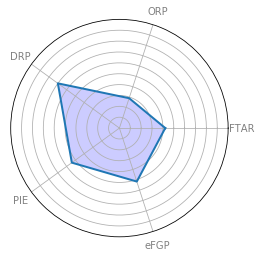

In [13]:
plot_team(get_stats(1104,2018, categories),categories)

In [ ]:
plot_team(get_stats(1175,2005, categories),categories)

In [47]:
w_vars = ['WOffRtg', 'WDefRtg', 'WNetRtg', 'WAstR', 'WTOR', 'WTSP', 'WeFGP', 'WFTAR', 'WORP', 'WDRP', 'WRP', 'WPIE']
l_vars = ['LOffRtg', 'LDefRtg', 'LNetRtg', 'LAstR', 'LTOR', 'LTSP', 'LeFGP', 'LFTAR', 'LORP', 'LDRP', 'LRP', 'LPIE']
d_vars = ['DOffRtg', 'DDefRtg', 'DNetRtg', 'DAstR', 'DTOR', 'DTSP', 'DeFGP', 'DFTAR', 'DORP', 'DDRP', 'DRP', 'DPIE']

In [48]:
#for d in d_vars:
 #   df[d] = 0

for w,l,d in zip(w_vars, l_vars, d_vars):
    df[d] = df[w] - df[l]

In [49]:
for i in categories:
    df[i] = df['D'+i]  

In [52]:
df.head(3)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WPts,LPts,...,DeFGP,DFTAR,DORP,DDRP,DRP,DPIE,FTAR,ORP,PIE,eFGP
0,2003,10,1104,68,1328,62,N,0,68,62,...,0.057417,-0.104750,0.094771,0.094771,0.094771,0.065693,-0.104750,0.094771,0.065693,0.057417
1,2003,10,1272,70,1393,63,N,0,70,63,...,0.080886,0.007944,-0.041667,-0.041667,-0.041667,0.204678,0.007944,-0.041667,0.204678,0.080886
2,2003,11,1266,73,1437,61,N,0,73,61,...,0.160841,0.184932,-0.107962,-0.107962,-0.107962,0.472868,0.184932,-0.107962,0.472868,0.160841


In [97]:
columns = ['Season', 'TeamID1', 'TeamID2', 'Rating', 'Rating_y']

In [99]:
df_trnW = joined_df[columns+categories].copy()

In [100]:
df_trnW.head(3)

,Season,TeamID1,TeamID2,Rating,Rating_y,FTAR,ORP,DRP,PIE,eFGP
0,2003,1104,1328,83,91,-0.104750,0.094771,0.094771,0.065693,0.057417
1,2003,1272,1393,85,89,0.007944,-0.041667,-0.041667,0.204678,0.080886
2,2003,1266,1437,91,79,0.184932,-0.107962,-0.107962,0.472868,0.160841


In [101]:
df_trnL = df_trnW[columns].copy()

In [102]:
df_trnL[categories] = -df_trnW[categories].copy()

In [103]:
df_trnL.head(2)

,Season,TeamID1,TeamID2,Rating,Rating_y,FTAR,ORP,DRP,PIE,eFGP
0,2003,1104,1328,83,91,0.104750,-0.094771,-0.094771,-0.065693,-0.057417
1,2003,1272,1393,85,89,-0.007944,0.041667,0.041667,-0.204678,-0.080886


In [104]:
df_trnW['Result'] = 1
df_trnL['Result'] = 0

In [60]:
df_trnW.rename(columns={'WTeamID': 'TeamID1', 'LTeamID': 'TeamID2'}, inplace=True)
df_trnL.rename(columns={'WTeamID': 'TeamID1', 'LTeamID': 'TeamID2'}, inplace=True)

In [107]:
#df_trnW.loc[:,['TeamID1', 'TeamID2']] = df.loc[:,['WTeamID', 'LTeamID']].values
df_trnL.loc[:,['TeamID1', 'TeamID2']] = df_trnL.loc[:,['TeamID2', 'TeamID1']].values

In [108]:
df_trn = pd.concat((df_trnW, df_trnL))

In [110]:
df_trn.head()

,Season,TeamID1,TeamID2,Rating,Rating_y,FTAR,ORP,DRP,PIE,eFGP,Result
0,2003,1104,1328,83,91,-0.104750,0.094771,0.094771,0.065693,0.057417,1
1,2003,1272,1393,85,89,0.007944,-0.041667,-0.041667,0.204678,0.080886,1
2,2003,1266,1437,91,79,0.184932,-0.107962,-0.107962,0.472868,0.160841,1
3,2003,1296,1457,74,71,0.509667,-0.241453,-0.241453,0.509434,0.084586,1
4,2003,1400,1208,93,88,-0.222369,0.042878,0.042878,0.141463,0.105500,1


In [63]:
df_trn.to_csv(f'{PATH}tmp/df_trn.csv', index=False)

In [47]:
df_trn = pd.read_csv(f'{PATH}tmp/df_trn.csv')

In [ ]:
df_trn[['Rating', 'Rating_y']] = df_trn[['Rating', 'Rating_y']].fillna(0.0).astype(int)

In [49]:
df_trn.head(3)

,Season,TeamID1,TeamID2,FTAR,ORP,DRP,PIE,eFGP,Result
0,2003,1104,1328,-0.104750,0.094771,0.094771,0.065693,0.057417,1
1,2003,1272,1393,0.007944,-0.041667,-0.041667,0.204678,0.080886,1
2,2003,1266,1437,0.184932,-0.107962,-0.107962,0.472868,0.160841,1


## Test Data

In [20]:
sample_sub.head(5)

,ID,Pred
0,2018_1104_1112,0.5
1,2018_1104_1113,0.5
2,2018_1104_1116,0.5
3,2018_1104_1120,0.5
4,2018_1104_1137,0.5


In [15]:
#df_sample_sub = pd.read_csv(f'{PATH}SampleSubmissionStage1.csv')
#df_sample_sub = pd.read_csv(f'{PATH}WSampleSubmissionStage1.csv')
df_sample_sub = sample_sub

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

n_test_games = len(df_sample_sub)

In [16]:
df_trn.shape

(164082, 9)

In [ ]:
X_test = np.zeros(shape=(n_test_games, len(categories)+2))
season = []
team1 = []
team2 = []
for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    season.append(year)
    team1.append(t1)
    team2.append(t2)
    ratings = np.hstack((get_ratings(t1, year, c), get_ratings(t2, year, c)))
    #t1_rating = get_ratings(t1, year, c)
    #t2_rating = get_ratings(t2, year, c)
    #stats = np.hstack((diff_stats, t1_rating))
    t1_stats = np.array(get_stats(t1, year, categories))
    t2_stats = np.array(get_stats(t2, year, categories))
    diff_stats = t1_stats - t2_stats
    stats = np.hstack((ratings, diff_stats))
    X_test[ii, :] = stats


In [114]:
X_test[:5, :7]

array([[81.     , 86.     ,  0.03391, -0.04023, -0.05474, -0.07625, -0.05264],
       [81.     , 83.     , -0.01017,  0.00767,  0.00659, -0.02814, -0.02393],
       [81.     , 84.     ,  0.03871, -0.00513,  0.01832, -0.00535, -0.02296],
       [81.     , 89.     ,  0.01913, -0.03707, -0.02087, -0.04004, -0.00343],
       [81.     , 77.     , -0.01022,  0.01791, -0.02457, -0.04344, -0.02664]])

## Create Category Variables

In [24]:
df_trn.tail(3)

,Season,TeamID1,TeamID2,FTAR,ORP,DRP,PIE,eFGP,Result
164079,2018,1426,1209,0.134085,0.202381,0.202381,-0.294118,-0.184524,0
164080,2018,1397,1246,-0.157419,0.054131,0.054131,-0.198113,-0.118387,0
164081,2018,1217,1335,-0.089510,0.062500,0.062500,-0.089202,-0.056643,0


In [32]:
cat_vars = ['TeamID1', 'TeamID2', 'Rating', 'Rating_y']

contin_vars = [categories]

In [ ]:
for v in cat_vars: df_trn[v] = df_trn[v].astype('category').cat.as_ordered()

In [117]:
train_cats(df_trn)

In [119]:
X_test_df = pd.DataFrame()

In [120]:
X_test_df['TeamID1'], X_test_df['TeamID2'], X_test_df['Season'] = team1, team2, season

In [122]:
X_test_df[['Rating', 'Rating_y']+categories] = pd.DataFrame(X_test)

In [123]:
X_test_df.head(3)

,TeamID1,TeamID2,Season,Ranking,Ranking_y,FTAR,ORP,DRP,PIE,eFGP
0,1104,1112,2018,81.0,86.0,0.033906,-0.040228,-0.054736,-0.076246,-0.052636
1,1104,1113,2018,81.0,83.0,-0.010167,0.007669,0.006590,-0.028141,-0.023935
2,1104,1116,2018,81.0,84.0,0.038708,-0.005134,0.018321,-0.005354,-0.022959


In [ ]:
#X_test_df.rename(columns={c : d for c,d in zip(X_test_df.columns, categories)}, inplace=True)

In [ ]:
#X_test_df.rename(columns={5: 'Rating', 6: 'Rating_y'}, inplace=True)

In [156]:
X_test_df.rename(columns={'Ranking_y': 'Rating_y'}, inplace=True)

In [157]:
apply_cats(X_test_df, df_trn)

In [158]:
for v in contin_vars:
    df_trn[v] = df_trn[v].astype('float32')
    X_test_df[v] = X_test_df[v].astype('float32')

In [ ]:
#X_test_df['Season'] = X_test_df['Season'].astype(np.int64)

In [126]:
X_test_df.drop('Season', inplace=True, axis=1)

In [127]:
X_test_df['Result'] = 0

In [ ]:
X_test_df.to_feather(f'{PATH}tmp/X_test_df')

In [27]:
X_test_df = pd.read_feather(f'{PATH}tmp/X_test_df')

In [28]:
X_test_df.head(3)

,FTAR,ORP,DRP,PIE,eFGP,Rating,Rating_y,TeamID1,TeamID2,Season,Result
0,0.033906,-0.040228,-0.054736,-0.076246,-0.052636,81,86,1104,1112,2018,0
1,-0.010167,0.007669,0.006590,-0.028141,-0.023935,81,83,1104,1113,2018,0
2,0.038708,-0.005134,0.018321,-0.005354,-0.022959,81,84,1104,1116,2018,0


In [29]:
X_test_df['Result'] = X_test_df['Result'].astype(np.int64)

In [30]:
X_test_df.shape

(2278, 11)

## Train Model

In [ ]:
# used only for women's NCAA because of inf/-inf value in PIE
df_trn.loc[df_trn.PIE>1, "PIE"] = 1
df_trn.loc[df_trn.PIE<1, "PIE"] = -1

In [ ]:
cat_sz = [(c, len(df_trn[c].cat.categories)+1) for c in cat_vars]

In [146]:
cat_sz

[('TeamID1', 356), ('TeamID2', 356), ('Rating', 40), ('Rating_y', 40)]

In [147]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [148]:
emb_szs

[(356, 50), (356, 50), (40, 20), (40, 20)]

In [149]:
dep = 'Result'

In [150]:
df_trn = df_trn[cat_vars+categories+[dep]].copy()
df_trn.head(2)

,TeamID1,TeamID2,Rating,Rating_y,FTAR,ORP,DRP,PIE,eFGP,Result
0,1104,1328,83,91,-0.104750,0.094771,0.094771,0.065693,0.057417,1
1,1272,1393,85,89,0.007944,-0.041667,-0.041667,0.204678,0.080886,1


In [151]:
X_test_df.head(2)

,TeamID1,TeamID2,Rating,Ranking_y,FTAR,ORP,DRP,PIE,eFGP,Result
0,1104,1112,81,86.0,0.033906,-0.040228,-0.054736,-0.076246,-0.052636,0
1,1104,1113,81,83.0,-0.010167,0.007669,0.006590,-0.028141,-0.023935,0


In [ ]:
df_trn.to_csv(f'{PATH}tmp/df_trn.csv', index=False)

In [25]:
df_trn = pd.read_csv(f'{PATH}tmp/df_trn.csv')

In [26]:
trn_df, y, nas, mapper = proc_df(df_trn, 'Result', do_scale=True)

In [161]:
val_idx = get_cv_idxs(len(trn_df), val_pct=0.2)

In [162]:
df_test, _, nas, mapper = proc_df(X_test_df, 'Result', do_scale=True, skip_flds=None,
                                  mapper=mapper, na_dict=nas)

In [ ]:
#df_test.drop('Season', inplace=True, axis=1)

In [163]:
trn_df.head(3)

,TeamID1,TeamID2,Rating,Rating_y,FTAR,ORP,DRP,PIE,eFGP
0,4,221,25,33,-0.460979,0.708397,0.708397,0.168876,0.450967
1,167,286,27,31,0.034960,-0.311450,-0.311450,0.526162,0.635296
2,161,329,33,21,0.813842,-0.806996,-0.806996,1.215591,1.263280


In [164]:
df_test.head(3)

,TeamID1,TeamID2,Rating,Rating_y,FTAR,ORP,DRP,PIE,eFGP
0,4,11,23,28,0.149212,-0.300698,-0.409144,-0.196003,-0.413416
1,4,12,23,25,-0.044744,0.057323,0.049258,-0.072341,-0.187990
2,4,15,23,26,0.170346,-0.038377,0.136944,-0.013762,-0.180326


In [165]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, trn_df, y.astype(np.int64), 
                                       cat_flds=cat_vars, bs=128, test_df=df_test)

In [166]:
#m = md.get_learner(emb_szs, len(trn_df.columns)-len(cat_vars),
 #                  0.04, 1, [1000,500], [0.001,0.01])
model = MixedInputModel(emb_szs, n_cont=0, emb_drop=0, out_sz=1, szs=[500], drops=[0.5]).cuda()

In [167]:
bm = BasicModel(model, 'binary_classifier')

In [168]:
m = StructuredLearner(md, bm)

In [169]:
m.crit = F.cross_entropy
m.crit

<function torch.nn.functional.cross_entropy>

In [ ]:
m.lr_find()

In [ ]:
m.sched.plot()

In [ ]:
lr = 1e-1
m.fit(lr, 3)

In [ ]:
preds,y = m.predict_with_targs(True)

In [ ]:
preds[:5]

In [ ]:
#preds = np.clip(preds, 0.05, 0.95)
metrics.log_loss(y, preds, eps=0.05)

In [ ]:
np.exp(-0.37697)

In [ ]:
accuracy_np(preds, y)

In [ ]:
m.save('trn_1')

In [ ]:
m.load('trn_1')

In [ ]:
# for women ncaa
m.save('trn_1')

In [ ]:
# for women ncaa
m.load('trn_1')

In [ ]:
pred_test = m.predict(True)

In [ ]:
pred_test = np.clip(pred_test, 0.05, 0.95)

In [ ]:
df_test['Result'] = pred_test

In [ ]:
rows = np.random.choice(df_test.index.values, 5)
sampled_df = df_test.iloc[rows]
sampled_df

In [ ]:
df_test.head(3)

In [ ]:
df_sample_sub.head(3)

In [ ]:
df_sample_sub['Pred'] = pred_test

In [ ]:
df_sample_sub.iloc[100:110]

In [ ]:
df_sample_sub.to_csv(f'{PATH}submissions/sub1.csv', index=False)

In [ ]:
sample_sub = pd.read_csv(f'{PATH}submissions/sub1.csv')

## Load the Training Data (from Basic Starter Kernel)

Adapted from Julia Elliot's [Basic Starter Kernel - NCAA Men's Dataset](https://www.kaggle.com/juliaelliott/basic-starter-kernel-ncaa-men-s-dataset).

In [ ]:
df_seeds = pd.read_csv(PATH+'NCAATourneySeeds.csv')
df_tour = pd.read_csv(PATH+'NCAATourneyCompactResults.csv')

In [ ]:
df_seeds = df_seeds[df_seeds['Season']>=2003]
df_tour = df_tour[df_tour['Season']>=2003]

In [ ]:
df_seeds.head()

In [ ]:
df_tour.head()

In [ ]:
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int
df_seeds['seed_int'] = df_seeds.Seed.apply(seed_to_int)
df_seeds.drop(labels=['Seed'], inplace=True, axis=1) # This is the string label
df_seeds.head()

In [ ]:
df_tour.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tour.head()

In [ ]:
df_seeds = df_seeds.merge(df_teams, 'left', ['Season', 'TeamID'])

In [ ]:
# merge the seeds with their corresponding TeamID's in the compact results dataframe
df_winseeds = df_seeds.rename(columns={'TeamID':'WTeamID', 'seed_int':'WSeed'})
df_lossseeds = df_seeds.rename(columns={'TeamID':'LTeamID', 'seed_int':'LSeed'})
df_dummy = pd.merge(left=df_tour, right=df_winseeds, how='left', on=['Season', 'WTeamID'])
df_concat = pd.merge(left=df_dummy, right=df_lossseeds, on=['Season', 'LTeamID'])
df_concat['SeedDiff'] = df_concat.WSeed - df_concat.LSeed
df_concat.head()